Three Observable Trends
-The larger the volume of rides for a city, the lower the average fare
-There is an increase in volume of rides the more dense the population (Rural - Suburban - Urban)
-There is a larger volume of rides per city with the greater number of drivers per city

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
#extract file
path1 = os.path.join("Resource","ride_data.csv")
path2 = os.path.join("Resource","city_data.csv")
ride_df = pd.read_csv(path1)
city_df = pd.read_csv(path2)
city_df.head(1)

,city,driver_count,type
0,Kelseyland,63,Urban


In [3]:
#Dataframe pyber data
pyber_df = pd.merge(city_df, ride_df, on="city")
pyber_df.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
#Groupby 
pyber_gb = pyber_df.groupby(["type", "city"])
driver_count = pyber_gb.mean()["driver_count"]
avg_fare = pyber_gb.mean()["fare"]
ride_count = pyber_gb.count()["ride_id"]


In [5]:
#Dataframe
pyberplot_df = pd.DataFrame({ "Driver Count": driver_count,
                              "Average Fare": avg_fare,
                              "Ride Count": ride_count
                                })
pyberplot_df

Average Fare  Driver Count  Ride Count
type     city                                                        
Rural    East Leslie              33.660909           9.0          11
         East Stephen             39.053000           6.0          10
         East Troybury            33.244286           3.0           7
         Erikport                 30.043750           3.0           8
         Hernandezshire           32.002222          10.0           9
         Horneland                21.482500           8.0           4
         Jacksonfort              32.006667           6.0           6
         Kennethburgh             36.928000           3.0          10
         Kinghaven                34.980000           3.0           6
         Manuelchester            49.620000           7.0           1
         Matthewside              43.532500           4.0           4
         New Johnbury             35.042500           6.0           4
         North Whitney            38.146000          10.0          10
         Shelbyhaven              34.828333           9.0           6
         South Elizabethmouth     28.698000           3.0           5
         South Joseph             38.983333           3.0          12
         Stevensport              31.948000           6.0           5
         West Kevintown           21.528571           5.0           7
Suburban Anitamouth               37.315556          16.0           9
         Campbellport             33.711333          26.0          15
         Carrollbury              36.606000           4.0          10
         Clarkstad                31.051667          21.0          12
         Conwaymouth              34.591818          18.0          11
         East Cherylfurt          31.416154           9.0          13
         East Jenniferchester     32.599474          22.0          19
         Floresberg               32.310000           7.0          10
         Jasonfort                27.831667          25.0          12
         Jeffreyton               33.165556           8.0          18
         Johnland                 28.752778          13.0          18
         Kyleton                  31.167500          12.0          16
...                                     ...           ...         ...
Urban    Port Martinberg          22.329524          44.0          21
         Port Samantha            27.047407          55.0          27
         Prattfurt                23.346667          43.0          24
         Rodriguezburgh           21.332609          52.0          23
         Russellport              22.486087           9.0          23
         Sandymouth               23.105926          11.0          27
         Sarabury                 23.490000          46.0          27
         Smithhaven               22.788889          67.0          27
         South Bryanstad          24.598571          73.0          21
         South Josephville        26.823750           4.0          24
         South Louis              27.087500          12.0          32
         South Roy                26.031364          35.0          22
         Spencertown              23.681154          68.0          26
         Stewartview              21.614000          49.0          30
         Swansonbury              27.464706          64.0          34
         Torresshire              24.207308          70.0          26
         Travisville              27.220870          37.0          23
         Vickimouth               21.474667          13.0          15
         West Alexis              19.523000          47.0          20
         West Brandy              24.157667          12.0          30
         West Brittanyton         25.436250           9.0          24
         West Dawnfurt            22.330345          34.0          29
         West Jefferyfurt         21.072857          65.0          21
         West Oscar               24.280000          11.0          29
         West Peter               24.8754

In [6]:
# Create data series by type
pyber_df_rural = pyber_df[(pyber_df["type"] == "Rural")]
pyber_df_urban = pyber_df[(pyber_df["type"] == "Urban")]
pyber_df_suburban = pyber_df[(pyber_df["type"] == "Suburban")]

#for rural
driver_count_rural = pyber_df_rural.groupby(["city"]).mean()["driver_count"]
avg_fare_rural = pyber_df_rural.groupby(["city"]).mean()["fare"]
ride_count_rural = pyber_df_rural.groupby(["city"]).count()["ride_id"]

#for urban
driver_count_urban = pyber_df_urban.groupby(["city"]).mean()["driver_count"]
avg_fare_urban = pyber_df_urban.groupby(["city"]).mean()["fare"]
ride_count_urban = pyber_df_urban.groupby(["city"]).count()["ride_id"]

#for suburban
driver_count_suburban = pyber_df_suburban.groupby(["city"]).mean()["driver_count"]
avg_fare_suburban = pyber_df_suburban.groupby(["city"]).mean()["fare"]
ride_count_suburban = pyber_df_suburban.groupby(["city"]).count()["ride_id"]


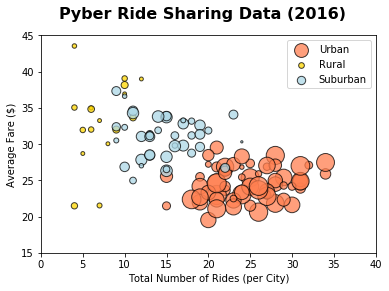

In [7]:
fig, ax = plt.subplots()

fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=16, fontweight="bold")

ax.set_xlim(0, 40)
ax.set_ylim(15, 45)

ax.set_xlabel("Total Number of Rides (per City)")
ax.set_ylabel("Average Fare ($)")

#Plot urban
plt.scatter(ride_count_urban, avg_fare_urban, marker="o", facecolors="coral", edgecolors="black",
            s=driver_count_urban*5, alpha=0.75, label="Urban")

#Plot rural
plt.scatter(ride_count_rural, avg_fare_rural, marker="o", facecolors="gold", edgecolors="black",
            s=driver_count_rural*5, alpha=0.75, label="Rural")

#Plot suburban
plt.scatter(ride_count_suburban, avg_fare_suburban, marker="o", facecolors="lightblue", edgecolors="black",
            s=driver_count_suburban*5, alpha=0.75, label="Suburban")

ax.legend(loc='upper right', fontsize='medium')

plt.show()

In [14]:
#City type sum fare
pyber_type = pyber_df.groupby(["type"])

# Collect the trips of the 'bikeid' above
sumby_fare = pyber_type.sum()["fare"]

# Create a pie chart based upon the trip duration of that
# single bike
fare_pie = sumby_fare.plot(kind="pie")
plt.title("% of Total Fares by City Type")

plt.show()

NameError: name 'explode' is not defined

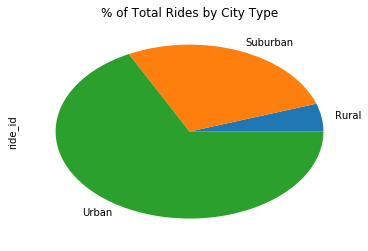

In [11]:
#City type sum rides
pyber_type = pyber_df.groupby(["type"])

# Collect the trips of the 'bikeid' above
sumby_ride = pyber_type.count()["ride_id"]

# Create a pie chart based upon the trip duration of that
# single bike
fare_pie = sumby_ride.plot(kind="pie")
plt.title("% of Total Rides by City Type")

plt.show()

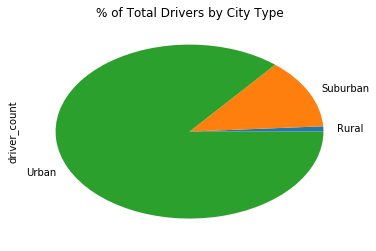

In [12]:
#City type sum drivers
pyber_type = pyber_df.groupby(["type"])

# Collect the trips of the 'bikeid' above
sumby_driver = pyber_type.sum()["driver_count"]

# Create a pie chart based upon the trip duration of that
# single bike
fare_pie = sumby_driver.plot(kind="pie")
plt.title("% of Total Drivers by City Type")

plt.show()